# Algunos pasos comunes para la limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("listo")

listo


## Cargando datos a evaluar

In [2]:
df_diabetes = pd.read_csv("/kaggle/input/d/mathchi/diabetes-data-set/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Revisión inicial de un dataset

- ```.info()```: muestra información general sobre el DataFrame.
    - Número total de filas
    - Nombre de cada columna
    - Tipo de dato (int64, float64, object, etc.)
    - Número de valores no nulos por columna
    - Uso aproximado de memoria
- ```.describe()```: genera estadísticas descriptivas para cada columna numérica por defecto.
    - **count**: número de valores no nulos
    - **mean**: media
    - **std**: desviación estándar
    - **min, max**: valores mínimo y máximo
    - **25%, 50%, 75%**: percentiles

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Manejo de datos faltantes 

Creando el dataframe de ejemplo

In [5]:
np.random.seed(42)
var_1 = np.random.rand(300)
nan_indices_var_1 = np.random.choice(len(var_1), 10, replace=False)
var_1[nan_indices_var_1] = np.nan # asignando valores nulos
var_2 = np.random.rand(300)
nan_indices_var_2 = np.random.choice(len(var_2), 15, replace=False)
var_2[nan_indices_var_2] = np.nan # asignando valores nulos
var_3 = np.random.rand(300)
var_4 = np.random.rand(300)
nan_indices_var_4 = np.random.choice(len(var_4), 40, replace=False)
var_4[nan_indices_var_4] = np.nan # asignando valores nulos
var_5 = np.random.rand(300)

df_nulls = pd.DataFrame({"var_1": var_1,
                         "var_2": var_2,
                         "var_3": var_3,
                         "var_4": var_4,
                         "var_5": var_5})
print(df_nulls.head())

      var_1     var_2     var_3     var_4     var_5
0  0.374540  0.026367  0.650167  0.020861  0.012715
1  0.950714  0.376463  0.364697  0.653263  0.992415
2  0.731994  0.810553  0.560677  0.332315  0.671455
3  0.598658  0.987276  0.481062  0.542479  0.316922
4  0.156019  0.150417  0.884998  0.493277  0.879269


## cantidad de valores nulos por columna

In [6]:
df_nulls.isnull().sum()

var_1    10
var_2    15
var_3     0
var_4    40
var_5     0
dtype: int64

## Eliminación de valores nulos (```NaN```) ya sea por columnas o filas

- Parámetros útiles de ```.dropna()```:
    - ```axis=0```: elimina filas que contienen valores nulos **(por defecto)**.
    - ```axis=1```: elimina columnas que contienen valores nulos.
    - ```how='any'```: elimina si hay al menos un valor nulo **(por defecto)**.
    - ```how='all'```: elimina si todos los valores son nulos.
    - ```subset=['var_1', 'var_2']```: aplica la eliminación solo a ciertas columnas. 

### Eliminación de filas con valores nulos

In [7]:
print(f"Cantidad de filas: {df_nulls.shape[0]}")
print("-"*50)
df_nulls_rows = df_nulls.dropna()
print(df_nulls_rows)
print("-"*50)
print(f"Cantidad de filas sin valores nulos: {df_nulls_rows.shape[0]}")

Cantidad de filas: 300
--------------------------------------------------
        var_1     var_2     var_3     var_4     var_5
0    0.374540  0.026367  0.650167  0.020861  0.012715
1    0.950714  0.376463  0.364697  0.653263  0.992415
2    0.731994  0.810553  0.560677  0.332315  0.671455
3    0.598658  0.987276  0.481062  0.542479  0.316922
4    0.156019  0.150417  0.884998  0.493277  0.879269
..        ...       ...       ...       ...       ...
293  0.360191  0.450839  0.329017  0.961666  0.110748
294  0.127061  0.113238  0.470183  0.634960  0.759582
295  0.522243  0.984841  0.744279  0.754838  0.988066
297  0.215821  0.124663  0.433655  0.409478  0.651668
299  0.085347  0.869896  0.161673  0.821806  0.254322

[240 rows x 5 columns]
--------------------------------------------------
Cantidad de filas sin valores nulos: 240


### Eliminación de columnas con valores nulos

In [8]:
print(f"Cantidad de columnas: {df_nulls.shape[1]}")
print("-"*50)
df_nulls_cols = df_nulls.dropna(axis=1)
print(df_nulls_cols)
print("-"*50)
print(f"Cantidad de columnas sin valores nulos: {df_nulls_cols.shape[1]}")

Cantidad de columnas: 5
--------------------------------------------------
        var_3     var_5
0    0.650167  0.012715
1    0.364697  0.992415
2    0.560677  0.671455
3    0.481062  0.316922
4    0.884998  0.879269
..        ...       ...
295  0.744279  0.988066
296  0.871833  0.901296
297  0.433655  0.651668
298  0.043662  0.314061
299  0.161673  0.254322

[300 rows x 2 columns]
--------------------------------------------------
Cantidad de columnas sin valores nulos: 2


## Demostración de los valores nulos

### Cantidad y porcentaje de valores nulos por variable (columnas)

  variables  nulos  porc_nulos
0     var_1     10        3.33
1     var_2     15        5.00
2     var_3      0        0.00
3     var_4     40       13.33
4     var_5      0        0.00


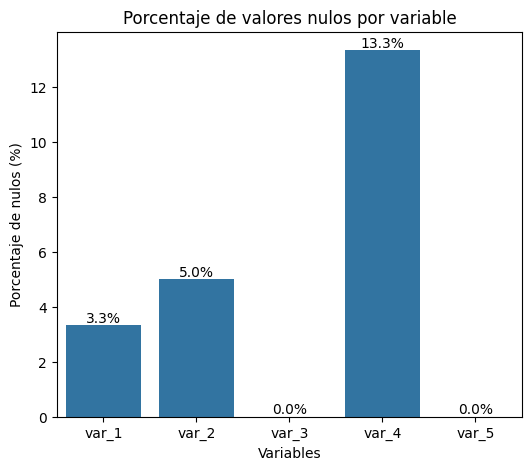

In [9]:
nulls_vars = df_nulls.isnull().sum().reset_index(name="nulos").rename(columns={"index":"variables"})
nulls_vars["porc_nulos"] = round(nulls_vars["nulos"]/df_nulls.shape[0]*100, 2)
print(nulls_vars)

fig, ax = plt.subplots(figsize=(6, 5))
graf = sns.barplot(data=nulls_vars, x="variables", y="porc_nulos")
for value in ax.containers:
    ax.bar_label(value, fmt="%.1f%%")
ax.set_title("Porcentaje de valores nulos por variable")
ax.set_ylabel("Porcentaje de nulos (%)")
ax.set_xlabel("Variables")
plt.show()

### Cantidad y porcentaje de valores nulos por casos (filas)

   num_casos  nulos  porc_nulos
0        147      2        40.0
1        138      2        40.0
2        270      2        40.0
3        126      2        40.0
4         93      2        40.0


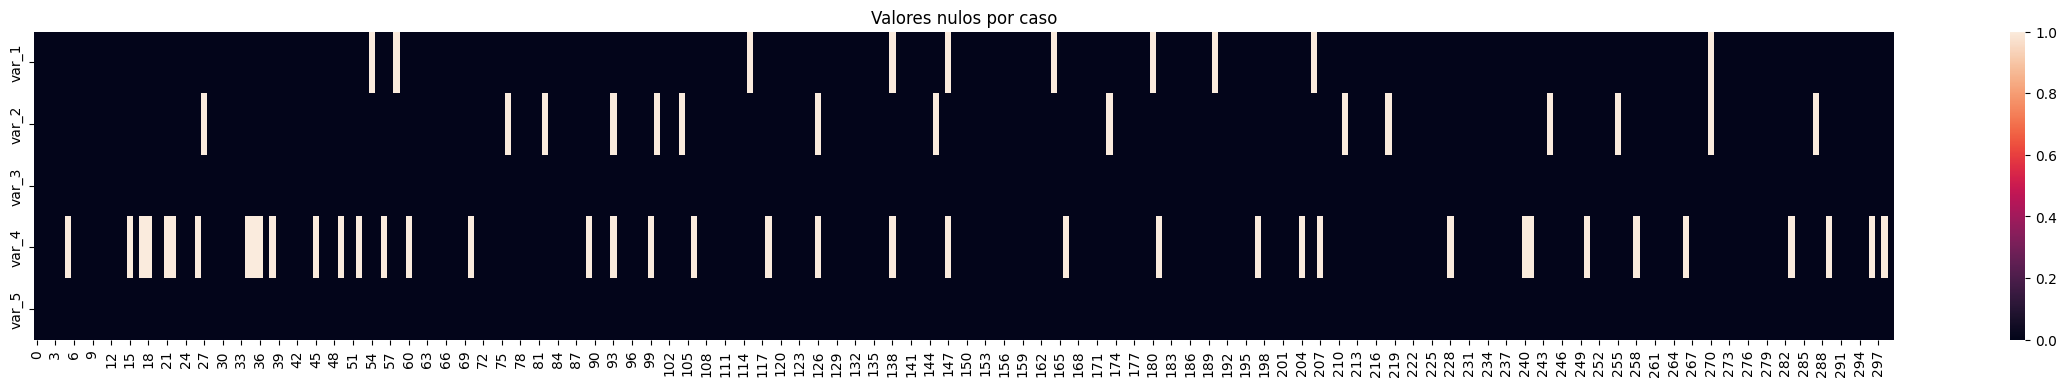

In [10]:
nulls_cases = df_nulls.assign(
    num_casos = df_nulls.index,
    nulos = df_nulls.isnull().sum(axis=1),
    porc_nulos = lambda df: round((df["nulos"]/df_nulls.shape[1])*100, 2)
).sort_values("porc_nulos", ascending=False)
print(nulls_cases[["num_casos","nulos","porc_nulos"]].reset_index(drop=True).head())

plt.figure(figsize=(30, 4))
plt.title("Valores nulos por caso")
sns.heatmap(df_nulls.isnull().transpose())
plt.show()

### Imputación de valores nulos por contexto

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", 
                        message="invalid value encountered in (greater|less)",
                        category=RuntimeWarning)
df_nulls_2 = pd.DataFrame({"var_1": [1,2,3,np.nan,4,5],
                           "var_2": [4,np.nan,1,2,np.nan,8],
                           "var_3": [9,1,2,3,np.nan, np.nan],
                           "var_4": [np.nan,7,4,3,2,1],
                          "var_5": ["si","si",np.nan,"no",np.nan, "si"]})
print(df_nulls_2)

   var_1  var_2  var_3  var_4 var_5
0    1.0    4.0    9.0    NaN    si
1    2.0    NaN    1.0    7.0    si
2    3.0    1.0    2.0    4.0   NaN
3    NaN    2.0    3.0    3.0    no
4    4.0    NaN    NaN    2.0   NaN
5    5.0    8.0    NaN    1.0    si


- ```.bfill()```: backward fill, completa los valores nulos con el último valor no nulo posterior (abajo hacia arriba)
- ```.ffill()```: forward fill, completa los valores nulos con el último valor no nulo anterior (arriba hacia abajo)

In [12]:
print(df_nulls_2.bfill())

   var_1  var_2  var_3  var_4 var_5
0    1.0    4.0    9.0    7.0    si
1    2.0    1.0    1.0    7.0    si
2    3.0    1.0    2.0    4.0    no
3    4.0    2.0    3.0    3.0    no
4    4.0    8.0    NaN    2.0    si
5    5.0    8.0    NaN    1.0    si


In [13]:
print(df_nulls_2.ffill())

   var_1  var_2  var_3  var_4 var_5
0    1.0    4.0    9.0    NaN    si
1    2.0    4.0    1.0    7.0    si
2    3.0    1.0    2.0    4.0    si
3    3.0    2.0    3.0    3.0    no
4    4.0    2.0    3.0    2.0    no
5    5.0    8.0    3.0    1.0    si


In [14]:
num = df_nulls_2.select_dtypes(include=np.number).fillna(0)
cat = df_nulls_2.select_dtypes(exclude=np.number).fillna("sin_resultado")
df_nulls_2_merge = pd.concat([num, cat], axis=1)
print(df_nulls_2_merge)

   var_1  var_2  var_3  var_4          var_5
0    1.0    4.0    9.0    0.0             si
1    2.0    0.0    1.0    7.0             si
2    3.0    1.0    2.0    4.0  sin_resultado
3    0.0    2.0    3.0    3.0             no
4    4.0    0.0    0.0    2.0  sin_resultado
5    5.0    8.0    0.0    1.0             si


### Imputación de valores nulos con Sklearn

- Algunos tipos de strategy en ```SimpleImputer()```:
    - ```'mean'```: Reemplaza los valores nulos con la media de la columna, aplicable a **valores numéricas**.
    - ```'median'```: Reemplaza con la mediana, aplicable a **valores numéricas**.
    - ```'most_frequent'```: Reemplaza con el valor más frecuente (moda) aplicable a **valores numéricas** y **categóricas**.

### Imputación de valores faltantes con la media de cada columna

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", 
                        message="invalid value encountered in (greater|less)",
                        category=RuntimeWarning)
df_nulls_3 = pd.DataFrame({"var_1": [1,2,3,"-",4,5,6,7,8,9,11],
                           "var_2": [4,"*",1,2,"*",8,7,8,9,11,12],
                           "var_3": [9,1,2,3,999,np.nan,11,12,13,15,17],
                           "var_4": [11111,7,4,3,2,1,11,14,15,9,8],
                           "var_5": ["si","si","sdsd","no","gg", "si","si","no","no","si","no"]})
print(df_nulls_3)

   var_1 var_2  var_3  var_4 var_5
0      1     4    9.0  11111    si
1      2     *    1.0      7    si
2      3     1    2.0      4  sdsd
3      -     2    3.0      3    no
4      4     *  999.0      2    gg
5      5     8    NaN      1    si
6      6     7   11.0     11    si
7      7     8   12.0     14    no
8      8     9   13.0     15    no
9      9    11   15.0      9    si
10    11    12   17.0      8    no


In [16]:
umbral = 0.01
prop = df_nulls_3["var_5"].value_counts()/df_nulls_3.shape[1]
valores = prop[prop > 0.3].index.tolist()

df_nulls_3["var_5"] = df_nulls_3["var_5"].apply(lambda x: x if x in valores else np.nan)
df_nulls_3

,var_1,var_2,var_3,var_4,var_5
0,1,4,9.0,11111,si
1,2,*,1.0,7,si
2,3,1,2.0,4,NaN
3,-,2,3.0,3,no
4,4,*,999.0,2,NaN
5,5,8,NaN,1,si
6,6,7,11.0,11,si
7,7,8,12.0,14,no
8,8,9,13.0,15,no
9,9,11,15.0,9,si


In [17]:
df_nulls_3[["var_1","var_2","var_3","var_4"]] = df_nulls_3[["var_1","var_2","var_3","var_4"]].apply(pd.to_numeric,errors="coerce")
df_nulls_3

,var_1,var_2,var_3,var_4,var_5
0,1.0,4.0,9.0,11111,si
1,2.0,NaN,1.0,7,si
2,3.0,1.0,2.0,4,NaN
3,NaN,2.0,3.0,3,no
4,4.0,NaN,999.0,2,NaN
5,5.0,8.0,NaN,1,si
6,6.0,7.0,11.0,11,si
7,7.0,8.0,12.0,14,no
8,8.0,9.0,13.0,15,no
9,9.0,11.0,15.0,9,si


In [18]:
df_nulls_3.describe()

,var_1,var_2,var_3,var_4
count,10.000000,9.000000,10.000000,11.000000
mean,5.600000,6.888889,108.200000,1016.818182
std,3.204164,3.822448,313.044477,3347.864627
min,1.000000,1.000000,1.000000,1.000000
25%,3.250000,4.000000,4.500000,3.500000
50%,5.500000,8.000000,11.500000,8.000000
75%,7.750000,9.000000,14.500000,12.500000
max,11.000000,12.000000,999.000000,11111.000000


In [19]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")
df_nulls_mean = si.fit_transform(df_nulls)
df_nulls_mean = pd.DataFrame(df_nulls_mean, columns=df_nulls.columns)
print("Valores calculados para imputar los valores faltantes en cada columna: {}".format(np.round(si.statistics_, 3)))
print(df_nulls_mean)

Valores calculados para imputar los valores faltantes en cada columna: [0.499 0.493 0.509 0.493 0.498]
        var_1     var_2     var_3     var_4     var_5
0    0.374540  0.026367  0.650167  0.020861  0.012715
1    0.950714  0.376463  0.364697  0.653263  0.992415
2    0.731994  0.810553  0.560677  0.332315  0.671455
3    0.598658  0.987276  0.481062  0.542479  0.316922
4    0.156019  0.150417  0.884998  0.493277  0.879269
..        ...       ...       ...       ...       ...
295  0.522243  0.984841  0.744279  0.754838  0.988066
296  0.769994  0.838898  0.871833  0.492849  0.901296
297  0.215821  0.124663  0.433655  0.409478  0.651668
298  0.622890  0.920842  0.043662  0.492849  0.314061
299  0.085347  0.869896  0.161673  0.821806  0.254322

[300 rows x 5 columns]


### Imputación basada en vecinos más cercanos (K-Nearest Neighbors).

In [20]:
from sklearn.impute import KNNImputer

knn_impute = KNNImputer(n_neighbors=2)
df_nulls_knn = knn_impute.fit_transform(df_nulls)
df_nulls_knn = pd.DataFrame(df_nulls_knn, columns=df_nulls.columns)

vals_imputados = {}
for col in df_nulls.columns:
    pos_nulls = df_nulls[col].isnull()
    vals_imputados[col] = df_nulls_knn.loc[pos_nulls, col].tolist()
print("Valores imputados por variable:")
for col, val in vals_imputados.items():
    valores = [round(float(v), 2) for v in val]
    print("variable {}: {}".format(col, valores))
print(df_nulls_knn)

Valores imputados por variable:
variable var_1: [0.41, 0.15, 0.79, 0.26, 0.29, 0.49, 0.49, 0.58, 0.54, 0.83]
variable var_2: [0.3, 0.32, 0.43, 0.68, 0.41, 0.86, 0.7, 0.82, 0.8, 0.81, 0.65, 0.77, 0.64, 0.66, 0.48]
variable var_3: []
variable var_4: [0.79, 0.17, 0.3, 0.58, 0.71, 0.73, 0.27, 0.33, 0.5, 0.45, 0.92, 0.77, 0.25, 0.61, 0.62, 0.27, 0.8, 0.27, 0.43, 0.63, 0.52, 0.83, 0.36, 0.41, 0.25, 0.66, 0.44, 0.69, 0.32, 0.53, 0.21, 0.33, 0.46, 0.29, 0.34, 0.24, 0.34, 0.21, 0.43, 0.7]
variable var_5: []
        var_1     var_2     var_3     var_4     var_5
0    0.374540  0.026367  0.650167  0.020861  0.012715
1    0.950714  0.376463  0.364697  0.653263  0.992415
2    0.731994  0.810553  0.560677  0.332315  0.671455
3    0.598658  0.987276  0.481062  0.542479  0.316922
4    0.156019  0.150417  0.884998  0.493277  0.879269
..        ...       ...       ...       ...       ...
295  0.522243  0.984841  0.744279  0.754838  0.988066
296  0.769994  0.838898  0.871833  0.432605  0.901296
297  0.215

## Manejo de datos faltantes implícitos

### Referido a los valores que no están registrados de forma explícita en el dataset, pero cuya ausencia representa un valor faltante.

In [21]:
import pandas as pd
import numpy as np
df_missing = pd.DataFrame.from_dict(
    data={
        "usuario": ["luis", "luis", "luis", "carlos"],
        "turno": ["mañana", "tarde", "noche", "mañana"],
        "monto": [250, 280, np.nan, 180]
    }
)
print(df_missing)

  usuario   turno  monto
0    luis  mañana  250.0
1    luis   tarde  280.0
2    luis   noche    NaN
3  carlos  mañana  180.0


### Extendiendo las categorías para mayor visualización de los datos faltantes implícitos

In [22]:
df_missing_pivot = pd.pivot_table(df_missing, values="monto", index="usuario", columns="turno", dropna=False)
df_missing_pivot

turno,mañana,noche,tarde
usuario,,,
carlos,180.0,NaN,NaN
luis,250.0,NaN,280.0


### Exponiendo los valores faltantes implícitas a explícitas

In [23]:
usuarios = df_missing["usuario"].unique()
turnos = df_missing["turno"].unique()
# creando todas las posibles combinaciones entre usuarios y turnos
usuarios_turnos = pd.MultiIndex.from_product([usuarios,turnos], names=["usuario","turno"]).to_frame(index=False)
# realizando el merge de acuerdo al usuario y turno
df_implicit = pd.merge(df_missing, usuarios_turnos, on=["usuario","turno"], how="right")
df_implicit

,usuario,turno,monto
0,luis,mañana,250.0
1,luis,tarde,280.0
2,luis,noche,NaN
3,carlos,mañana,180.0
4,carlos,tarde,NaN
5,carlos,noche,NaN


### Completando los valores faltantes implícitos

- completando los valores nulos con el promedio de cada monto por usuario

In [24]:
df_implicit["monto"] = df_implicit.groupby("usuario")["monto"].transform(lambda x: x.fillna(x.mean()))
print(df_implicit)

  usuario   turno  monto
0    luis  mañana  250.0
1    luis   tarde  280.0
2    luis   noche  265.0
3  carlos  mañana  180.0
4  carlos   tarde  180.0
5  carlos   noche  180.0


- Limitando la imputación de valores faltantes implícitos: solo se completarán con ceros aquellos campos que fueron expuestos en la tabla df_missing_pivot (pivot).

In [25]:
df_missing.set_index(["usuario","turno"]).reindex(usuarios_turnos, fill_value=0).reset_index()

,usuario,turno,monto
0,luis,mañana,250.0
1,luis,tarde,280.0
2,luis,noche,NaN
3,carlos,mañana,180.0
4,carlos,tarde,0.0
5,carlos,noche,0.0


In [29]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", 
                        message="invalid value encountered in (greater|less)",
                        category=RuntimeWarning)
df_nulls_3 = pd.DataFrame({"var_1": [1,2,3,"-",4,5,6,7,8,9,11,"+",23,14,17,19,43,45,56,34],
                           "var_2": [4,"*",1,2,"*",8,7,8,9,11,12,11,"+",23,14,17,19,43,45,56],
                           "var_3": [9,1,2,3,999,"=",11,"11",12,13,15,17,"14",13,15,17,"=",11,"=",11],
                           "var_4": [11111,7,4,3,2,1,11,14,15,9,8,"*",8,7,8,9,11,12,11,"+"],
                           "var_5": ["si","si","sdsd","no","gg", "si","si","no","no","si","no","no","si","no","dfref","dffwww!","no","si","no","####"],
                          "var_6": [np.nan,"gato","totuga","deded","erizo","gallo","perro","gato","totuga","gato","perro","gato","erizo","águila","totuga","gato","gato","perro","perro","gato"]})
print(df_nulls_3.head())

  var_1 var_2 var_3  var_4 var_5   var_6
0     1     4     9  11111    si     NaN
1     2     *     1      7    si    gato
2     3     1     2      4  sdsd  totuga
3     -     2     3      3    no   deded
4     4     *   999      2    gg   erizo


In [30]:
df_nulls_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   var_1   20 non-null     object
 1   var_2   20 non-null     object
 2   var_3   20 non-null     object
 3   var_4   20 non-null     object
 4   var_5   20 non-null     object
 5   var_6   19 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


## Transformando los valores de las variables numéricas

In [31]:
df_nulls_3[["var_1","var_2","var_3","var_4"]] = df_nulls_3[["var_1","var_2","var_3","var_4"]].apply(pd.to_numeric,errors="coerce")
df_nulls_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var_1   18 non-null     float64
 1   var_2   17 non-null     float64
 2   var_3   17 non-null     float64
 3   var_4   18 non-null     float64
 4   var_5   20 non-null     object 
 5   var_6   19 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [32]:
df_nulls_3.head()

,var_1,var_2,var_3,var_4,var_5,var_6
0,1.0,4.0,9.0,11111.0,si,NaN
1,2.0,NaN,1.0,7.0,si,gato
2,3.0,1.0,2.0,4.0,sdsd,totuga
3,NaN,2.0,3.0,3.0,no,deded
4,4.0,NaN,999.0,2.0,gg,erizo


## Eliminando valores "raros" de las variables categóricas

In [33]:
def del_rare(df, umbral, columns=None):
    if columns is None:
        columns = df.select_dtypes(exclude=np.number).columns
    df_copy = df.copy()
    for col in columns:
        proporcion = df_copy[col].value_counts(dropna=False)/df_copy.shape[0]
        unicos = set(proporcion[proporcion > umbral].index.tolist())
        df_copy[col] = df_copy[col].apply(lambda x: x if x in unicos else np.nan)
    return df_copy

del_rare(df_nulls_3, umbral=0.1).head()

,var_1,var_2,var_3,var_4,var_5,var_6
0,1.0,4.0,9.0,11111.0,si,NaN
1,2.0,NaN,1.0,7.0,si,gato
2,3.0,1.0,2.0,4.0,NaN,totuga
3,NaN,2.0,3.0,3.0,no,NaN
4,4.0,NaN,999.0,2.0,NaN,NaN


## Manejo de valores duplicados

In [34]:
import pandas as pd

df_duplicates = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Ana', 'Luis', 'Marta', 'Pedro', 'Carlos', 'Ana', 'Luis'],
    'Edad': [25, 30, 22, 25, 30, 28, 35, 22, 25, 30],
    'Ciudad': ['Lima', 'Ica', 'Arequipa', 'Lima', 'Ica', 'Puno', 'Lima', 'Ucayali', 'Puno', 'Ica'],
    'Puntaje': [85, 90, 88, 85, 90, 92, 80, 88, 85, 90],
    'Activo': [True, True, False, True, True, True, False, False, True, True]
})
print(df_duplicates)

   Nombre  Edad    Ciudad  Puntaje  Activo
0     Ana    25      Lima       85    True
1    Luis    30       Ica       90    True
2  Carlos    22  Arequipa       88   False
3     Ana    25      Lima       85    True
4    Luis    30       Ica       90    True
5   Marta    28      Puno       92    True
6   Pedro    35      Lima       80   False
7  Carlos    22   Ucayali       88   False
8     Ana    25      Puno       85    True
9    Luis    30       Ica       90    True


### Marcación de filas duplicadas

- Parámetros útiles de ```.duplicated()```:
    - ```keep="first"```: no muestra la primera aparición de cada duplicado.
    - ```keep="last"```: no muestra la última aparición de cada duplicado.
    - ```subset=['var_1', 'var_2']```: especifica qué columnas considerar para identificar duplicados.

### Filas o casos que son duplicados, considerando todas las columnas por defecto, excluyendo la primera aparición de cada grupo de duplicados.


In [35]:
print(df_duplicates[df_duplicates.duplicated(keep="first")])

  Nombre  Edad Ciudad  Puntaje  Activo
3    Ana    25   Lima       85    True
4   Luis    30    Ica       90    True
9   Luis    30    Ica       90    True


### Filas o casos que son duplicados, considerando todas las columnas por defecto, excluyendo la última aparición de cada grupo de duplicados.

In [36]:
print(df_duplicates[df_duplicates.duplicated(keep="last")])

  Nombre  Edad Ciudad  Puntaje  Activo
0    Ana    25   Lima       85    True
1   Luis    30    Ica       90    True
4   Luis    30    Ica       90    True


### Filas o casos que son duplicados, considerando la primera aparición del valor del la columna "Ciudad", excluyendo la primera aparición de cada grupo de duplicados.

In [37]:
print(df_duplicates[df_duplicates.duplicated(keep="first", subset=["Ciudad"])])

  Nombre  Edad Ciudad  Puntaje  Activo
3    Ana    25   Lima       85    True
4   Luis    30    Ica       90    True
6  Pedro    35   Lima       80   False
8    Ana    25   Puno       85    True
9   Luis    30    Ica       90    True


### Eliminación de filas duplicadas

- Parámetros útiles ```.drop_duplicates()```:
    - ```keep="first"```: conserva la primera aparición de cada duplicado.
    - ```keep="last"```: conserva la última aparición de cada duplicado.
    - ```keep=False```: elimina todos los duplicados.
    - ```subset=['var_1', 'var_2']```: especifica qué columnas considerar para identificar duplicados.

- ### Conservación de la primera aparición de cada duplicado

In [38]:
df_duplicates.drop_duplicates(keep="first")

,Nombre,Edad,Ciudad,Puntaje,Activo
0,Ana,25,Lima,85,True
1,Luis,30,Ica,90,True
2,Carlos,22,Arequipa,88,False
5,Marta,28,Puno,92,True
6,Pedro,35,Lima,80,False
7,Carlos,22,Ucayali,88,False
8,Ana,25,Puno,85,True


- ### Conservación de la última aparición de cada duplicado

In [39]:
df_duplicates.drop_duplicates(keep="last")

,Nombre,Edad,Ciudad,Puntaje,Activo
2,Carlos,22,Arequipa,88,False
3,Ana,25,Lima,85,True
5,Marta,28,Puno,92,True
6,Pedro,35,Lima,80,False
7,Carlos,22,Ucayali,88,False
8,Ana,25,Puno,85,True
9,Luis,30,Ica,90,True


- ### Eliminación de todas las filas duplicadas

In [40]:
df_duplicates.drop_duplicates(keep=False)

,Nombre,Edad,Ciudad,Puntaje,Activo
2,Carlos,22,Arequipa,88,False
5,Marta,28,Puno,92,True
6,Pedro,35,Lima,80,False
7,Carlos,22,Ucayali,88,False
8,Ana,25,Puno,85,True


## Corrección de tipos de datos

In [41]:
df_data = pd.DataFrame({'fecha_nacimiento': ['2015-12-07', '2015-07-23', '2016-12-17'],
                        'puntaje': ['15', '17', '12'],
                        'seccion': ['A', 'B', 'C']})
print(df_data.info())
print("="*50)
print(df_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_nacimiento  3 non-null      object
 1   puntaje           3 non-null      object
 2   seccion           3 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes
None
  fecha_nacimiento puntaje seccion
0       2015-12-07      15       A
1       2015-07-23      17       B
2       2016-12-17      12       C


### Dado las variables del dataframe se propone a corregir los tipos de datos ya sea fecha, número enteros y de tipo categórico

In [42]:
df_data["fecha_nacimiento"] = pd.to_datetime(df_data["fecha_nacimiento"])
df_data["puntaje"] = df_data["puntaje"].astype(int)
df_data["seccion"] = df_data["seccion"].astype("category")

Verificando el cambio de tipo de dato para cada variable:

* Tipo fecha ```datetime64[ns]```
* Entero ```int64```
* Categórico ```category```


In [43]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_nacimiento  3 non-null      datetime64[ns]
 1   puntaje           3 non-null      int64         
 2   seccion           3 non-null      category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 315.0 bytes


### Corrección de algunos valores que indican fecha

Los valores de fecha han sido ingresados como enteros ```int64``` 

In [44]:
df_date = pd.DataFrame({"fecha_inscripcion": [20240115, 20240216, 20240305],
                        "usuario": ["Luis", "Diego", "Elizabeth"]})
print(df_date.info())
print("="*50)
print(df_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha_inscripcion  3 non-null      int64 
 1   usuario            3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None
   fecha_inscripcion    usuario
0           20240115       Luis
1           20240216      Diego
2           20240305  Elizabeth


Cambiando el tipo de dato a la columna fecha_inscripcion ```datetime64[ns]```

In [45]:
df_date["fecha_inscripcion"] = pd.to_datetime(df_date["fecha_inscripcion"].astype(str),
                                             format="%Y%m%d")
print(df_date.info())
print("="*50)
print(df_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_inscripcion  3 non-null      datetime64[ns]
 1   usuario            3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes
None
  fecha_inscripcion    usuario
0        2024-01-15       Luis
1        2024-02-16      Diego
2        2024-03-05  Elizabeth


## Normalización y estandarización de datos

### Creación de los datos siguiendo una distribución normal

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
datos = np.random.normal(60, 12, 700)

### Estandarización con ```Standard Scaler()``` y ```MinMaxScaler()```

- ```StandardScaler```: Transforma los datos para que tengan media 0 y desviación estándar 1.
- ```MinMaxScaler```: Escala los datos para que estén dentro de un rango definido, entre 0 y 1.

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
datos_sc = sc.fit_transform(datos.reshape(-1,1))

min_max = MinMaxScaler()
datos_min_max = min_max.fit_transform(datos.reshape(-1,1))

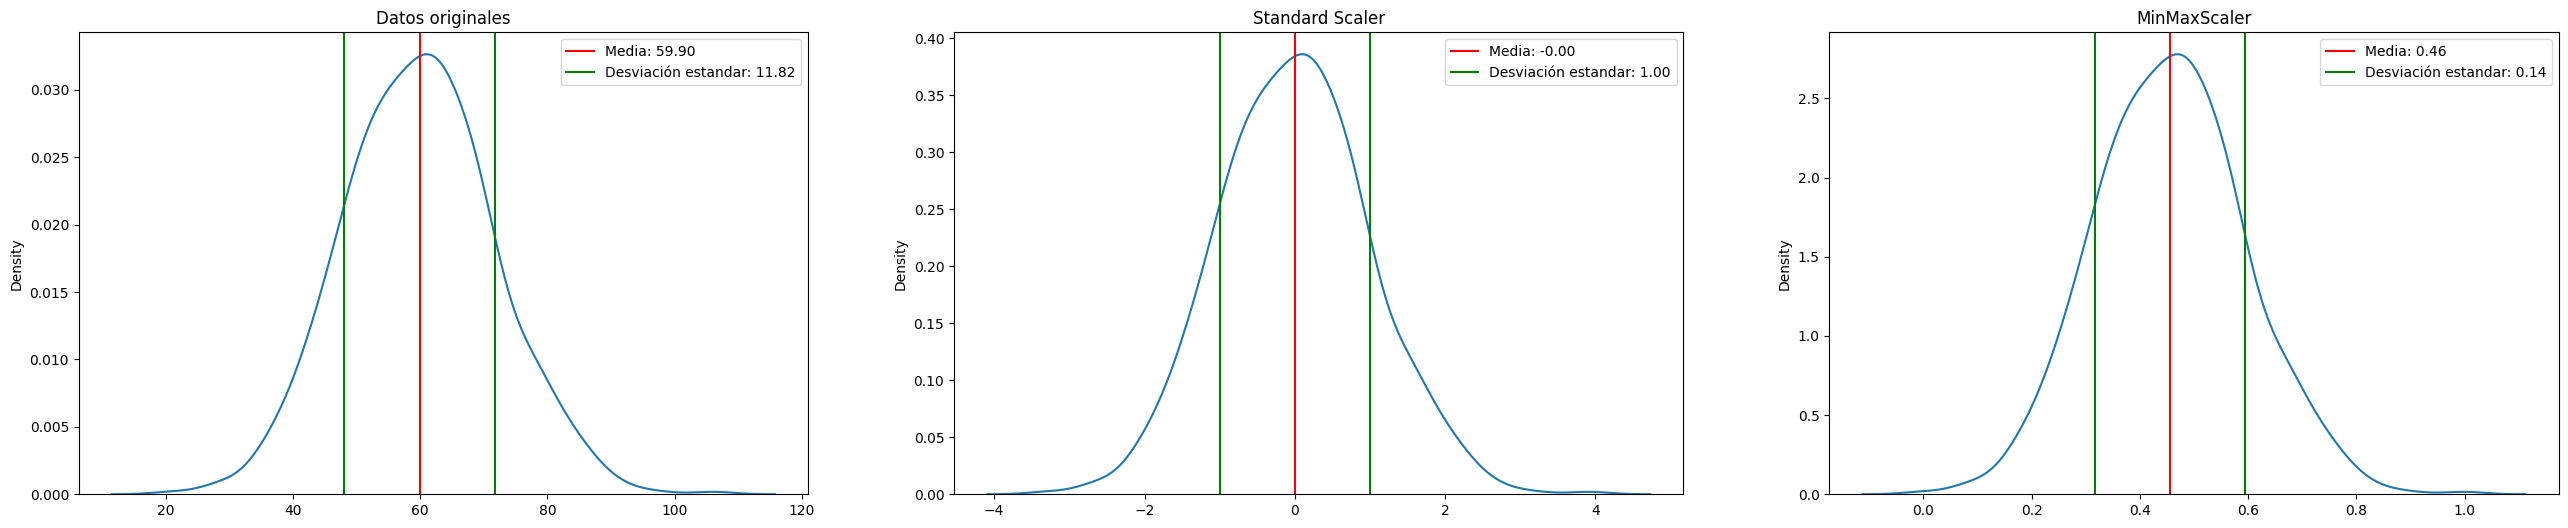

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(32, 6))
ax[0].set_title("Datos originales")
sns.kdeplot(datos, ax=ax[0])
ax[0].axvline(datos.mean(), color="red", label=f"Media: {datos.mean():.2f}")
ax[0].axvline(datos.mean() + datos.std(), color="green", label=f"Desviación estandar: {datos.std():.2f}")
ax[0].axvline(datos.mean() - datos.std(), color="green")
ax[0].legend(loc='upper right')
ax[1].set_title("Standard Scaler")
sns.kdeplot(datos_sc, ax=ax[1])
ax[1].axvline(datos_sc.mean(), color="red", label=f"Media: {datos_sc.mean():.2f}")
ax[1].axvline(datos_sc.mean() + datos_sc.std(), color="green", label=f"Desviación estandar: {datos_sc.std():.2f}")
ax[1].axvline(datos_sc.mean() - datos_sc.std(), color="green")
ax[1].legend(loc='upper right')
ax[2].set_title("MinMaxScaler")
sns.kdeplot(datos_min_max, ax=ax[2])
ax[2].axvline(datos_min_max.mean(), color="red", label=f"Media: {datos_min_max.mean():.2f}")
ax[2].axvline(datos_min_max.mean() + datos_min_max.std(), color="green", label=f"Desviación estandar: {datos_min_max.std():.2f}")
ax[2].axvline(datos_min_max.mean() - datos_min_max.std(), color="green")
ax[2].legend(loc='upper right')
plt.tight_layout
plt.show()

### Transformando los datos para que se asemeje a una distribución normal (Gaussiana)

- ### Creando datos siguiendo una distribución exponencial

In [49]:
np.random.seed(42)
datos_exp = np.random.exponential(scale=70, size=200)

Importando la librería para asemejarlo a una distribución normal con ```PowerTransformer```

- Métodos útiles:
    - ```method="box-cox"```: Requiere que todos los valores sean estrictamente positivos.
    - ```method="yeo-johnson"```: Adminte valores negativos y cero.

In [50]:
from sklearn.preprocessing import PowerTransformer

power_t = PowerTransformer(method="box-cox")
datos_exp_power = power_t.fit_transform(datos_exp.reshape(-1,1))

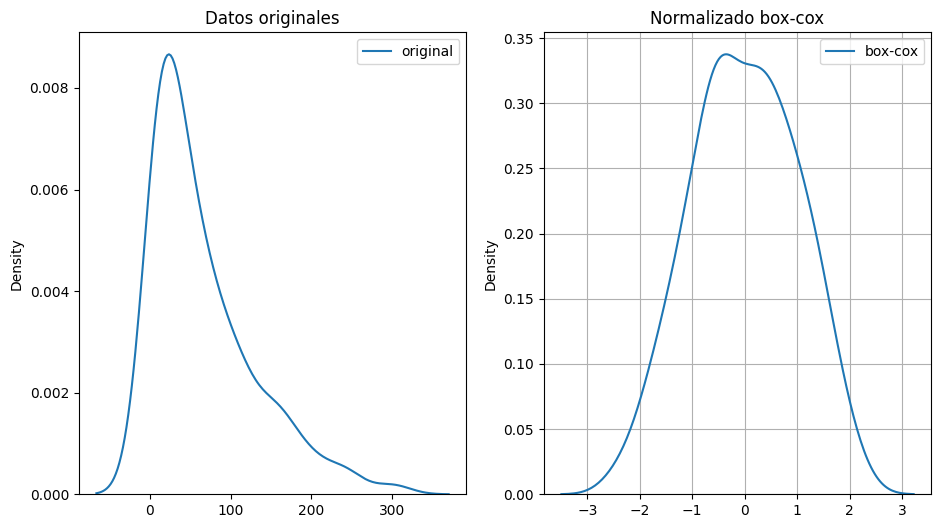

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
ax[0].set_title("Datos originales")
sns.kdeplot(datos_exp, ax=ax[0], label="original")
ax[0].legend()
ax[1].set_title("Normalizado box-cox")
sns.kdeplot(datos_exp_power, ax=ax[1], label="box-cox")
ax[1].legend()
plt.show()

## Manejo de valores atípicos (outliers)

In [68]:
np.random.seed(42)
# datos sesgados con distribución exponencial
datos_sesgados = np.random.exponential(scale=2, size=1000)
# insertando algunos outliers extremos manualmente
outliers = np.random.uniform(low=15, high=25, size=10)
datos_con_out = np.concatenate([datos_sesgados, outliers])

### Identificando outliers con el índice intercuartílico

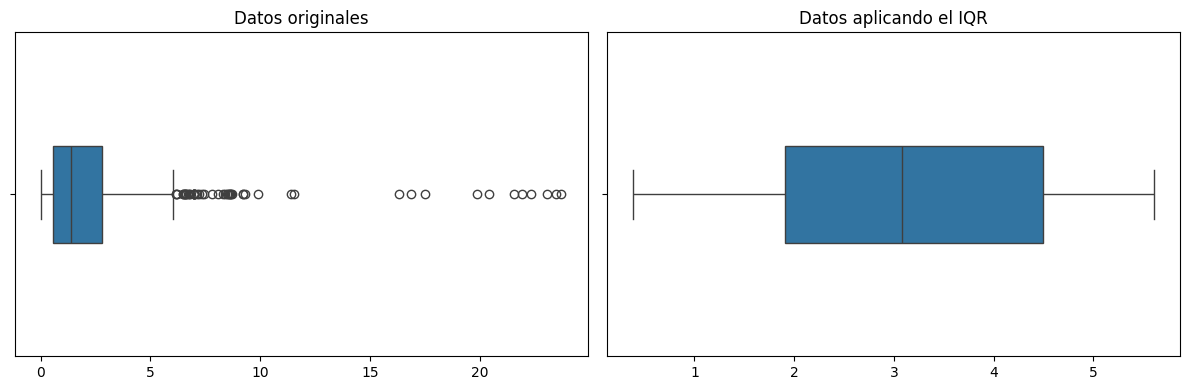

In [70]:
Q1 = np.percentile(datos_con_out, 25)
Q3 = np.percentile(datos_con_out, 75)
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
datos_sin_out = datos_exp[(datos_exp >= min)&(datos_exp <= max)]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title("Datos originales")
sns.boxplot(x=datos_con_out, width=0.3, ax=ax[0])
ax[1].set_title("Datos aplicando el IQR")
sns.boxplot(x=datos_sin_out, width=0.3, ax=ax[1])
plt.tight_layout()
plt.show()

## Corrección de errores tipográficos o errores de digitación

In [71]:
df_dig = pd.DataFrame({"profesion": ["administrador", "admin", "adm.", "psicologo", "psico", "psic."],
                       "nombres": ["alvaro", "diego", "ruben", "elizabeth", "veronica", "carla"],
                       "provincia": ["Lima", "LIMA", "lima", "Ate", "ate", "ate."]})
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      Lima
1          admin      diego      LIMA
2           adm.      ruben      lima
3      psicologo  elizabeth       Ate
4          psico   veronica       ate
5          psic.      carla      ate.


### Unificando datos categóricos de la columna profesion

In [85]:
df_dig.loc[df_dig["profesion"].str.contains("adm"), "profesion"] = "administrador"
df_dig.loc[df_dig["profesion"].str.contains("psic"), "profesion"] = "psicologo"
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      lima
1  administrador      diego      lima
2  administrador      ruben      lima
3      psicologo  elizabeth       ate
4      psicologo   veronica       ate
5      psicologo      carla      ate.


### Transformando a minúscula los valores categóricos de la columna provincia

In [86]:
df_dig["provincia"] = df_dig["provincia"].str.lower()
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      lima
1  administrador      diego      lima
2  administrador      ruben      lima
3      psicologo  elizabeth       ate
4      psicologo   veronica       ate
5      psicologo      carla      ate.


### Convirtiendo la primera letra en Mayúscula

In [89]:
df_dig["provincia"] = df_dig["provincia"].replace("ate.", "ate", regex=False)
df_dig["provincia"] = df_dig["provincia"].str.capitalize()
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      Lima
1  administrador      diego      Lima
2  administrador      ruben      Lima
3      psicologo  elizabeth       Ate
4      psicologo   veronica       Ate
5      psicologo      carla       Ate


## Codificación de variables categóricas

- ```OneHotEncoder()```:  utilizada para convertir variables categóricas. Cada categoría se convierte en una columna binaria (0 o 1).

- ```LabelBinarizer()```: utilizada para convertir etiquetas categóricas en una forma binaria. 

In [96]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer

data = {'Color': ['Rojo', 'Verde', 'Azul', 'Rojo', 'Azul'],
        'Animal': ['Perro', 'Gato', 'Pez', 'Gato', 'Perro'],
        'Clase': ['A', 'B', 'A', 'C', 'B']}

df = pd.DataFrame(data)
print(df)

   Color Animal Clase
0   Rojo  Perro     A
1  Verde   Gato     B
2   Azul    Pez     A
3   Rojo   Gato     C
4   Azul  Perro     B


### Transformado las variables independientes en formato one-hot-encoding

In [101]:
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown="ignore")
vars_ohe = ohe.fit_transform(df[["Color","Animal"]])
df_ohe = pd.DataFrame(vars_ohe, columns=ohe.get_feature_names_out())
print(df_ohe)

   Color_Azul  Color_Rojo  Color_Verde  Animal_Gato  Animal_Perro  Animal_Pez
0         0.0         1.0          0.0          0.0           1.0         0.0
1         0.0         0.0          1.0          1.0           0.0         0.0
2         1.0         0.0          0.0          0.0           0.0         1.0
3         0.0         1.0          0.0          1.0           0.0         0.0
4         1.0         0.0          0.0          0.0           1.0         0.0


### Transformado las variable dependiente en formato one-hot-encoding

In [105]:
lb = LabelBinarizer()
vars_lb = lb.fit_transform(df[["Clase"]])
df_lb = pd.DataFrame(vars_lb, columns=[f"Clase_{label}" for label in lb.classes_])
df_lb

,Clase_A,Clase_B,Clase_C
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
